In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")
df.dropna(subset=["reviewText"], inplace=True)
df.head()

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess
0,4,2,True,2017-04-06,Amazon Customer,helpful,Four Stars,4,0.333333
1,5,0,True,2017-03-14,Amazon Customer,easy understand prompt service,Five Stars,4,0.000000
2,4,0,True,2017-02-14,Christopher Burnett,girlfriend use quite often,Four Stars,4,0.000000
3,5,0,True,2017-01-29,Amazon Customer,arrive described happy,Very happy.,4,0.000000
4,5,0,True,2017-01-04,Iheartmanatees,love dummy series never fails,Love the Dummies Series,5,0.000000


In [3]:
# could use LogisticRegression classifier to map our numbers in the range [0,1]
# check accuracy and also youden's index
    # - use youden's index to get indication of our predictive power
# Compare how it performes with TF-IDF

split = 0.1

df["helpful"] = np.where(df.voteSuccess >= split, 1, 0)

x_train, x_test, y_train, y_test = train_test_split(df.reviewText, df.helpful, test_size=0.25, random_state=30)
df.head()

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess,helpful
0,4,2,True,2017-04-06,Amazon Customer,helpful,Four Stars,4,0.333333,1
1,5,0,True,2017-03-14,Amazon Customer,easy understand prompt service,Five Stars,4,0.000000,0
2,4,0,True,2017-02-14,Christopher Burnett,girlfriend use quite often,Four Stars,4,0.000000,0
3,5,0,True,2017-01-29,Amazon Customer,arrive described happy,Very happy.,4,0.000000,0
4,5,0,True,2017-01-04,Iheartmanatees,love dummy series never fails,Love the Dummies Series,5,0.000000,0


In [4]:
tm_vectorizer = CountVectorizer(stop_words="english")

term_matrix_train = tm_vectorizer.fit_transform(x_train)
term_matrix_test = tm_vectorizer.transform(x_test)

In [5]:
clf = LinearSVC(random_state=0, max_iter=10000)

clf.fit(term_matrix_train, y_train)
y_test_pred = clf.predict(term_matrix_test)

In [6]:
print("Document-term Matrix(Count Vectorizer) - SVM/SVC")
print(classification_report(y_test, y_test_pred, target_names=["Unhelpful", "Helpful"]))

Document-term Matrix(Count Vectorizer) - SVM/SVC
              precision    recall  f1-score   support

   Unhelpful       0.92      0.95      0.93      5747
     Helpful       0.38      0.30      0.34       648

    accuracy                           0.88      6395
   macro avg       0.65      0.62      0.63      6395
weighted avg       0.87      0.88      0.87      6395



<Figure size 720x576 with 0 Axes>

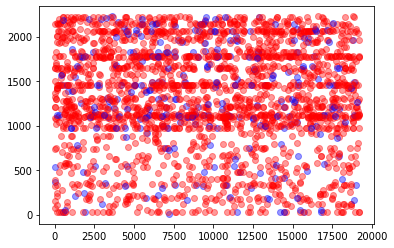

In [7]:
plt.figure(figsize=(10, 8))# Plotting our two-features-space
mtrx_dict = term_matrix_train.todok()
xy = list(mtrx_dict.keys())

colors=["#FF0000", "#0000FF"]

fig = plt.figure()
ax = fig.add_subplot()

LIMIT = 2500
data = random.sample(list(zip(xy, y_train)), LIMIT)
for i in range(len(data)):
    ax.scatter(x=data[i][0][0], y=data[i][0][1], color=colors[data[i][1]], alpha=0.4)
plt.show()